<a href="https://colab.research.google.com/github/robledoirismar230-stack/Proyecto-Dashboard-Completo/blob/README/Proyecto_18_de_nov_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Tipos de datos:
ChampionId       int64
ChampionName    object
dtype: object

Valores nulos por columna:
ChampionId      0
ChampionName    0
dtype: int64

Estadísticas:
       ChampionId
count  172.000000
mean   198.133721
std    248.125298
min      0.000000
25%     42.750000
50%    101.500000
75%    233.250000
max    950.000000

Limpieza aplicada: dropna() en ChampionId

Total 'alto valor': 51


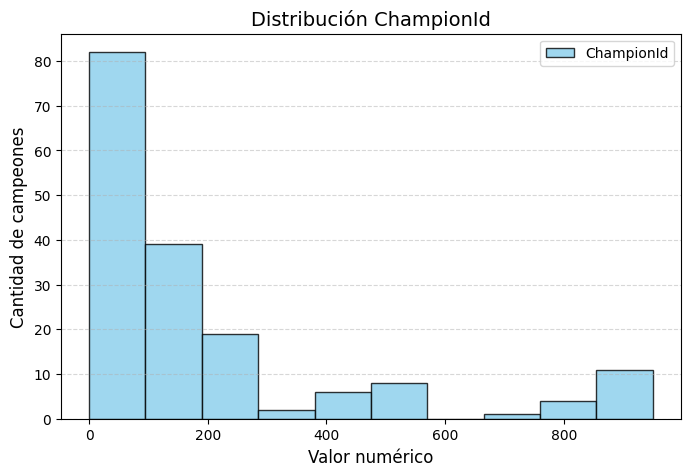

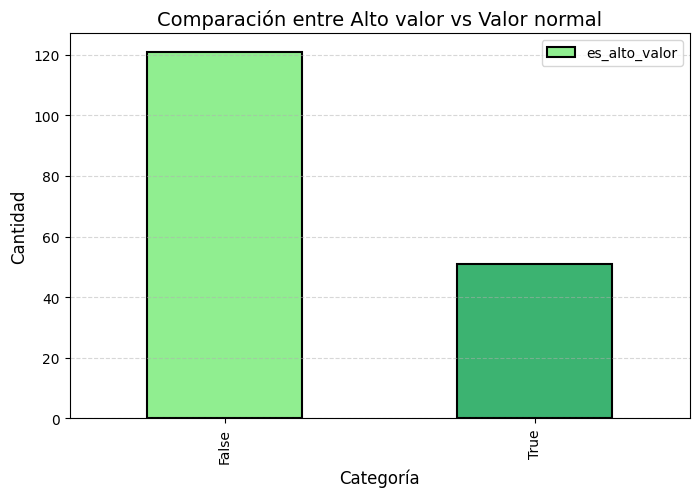

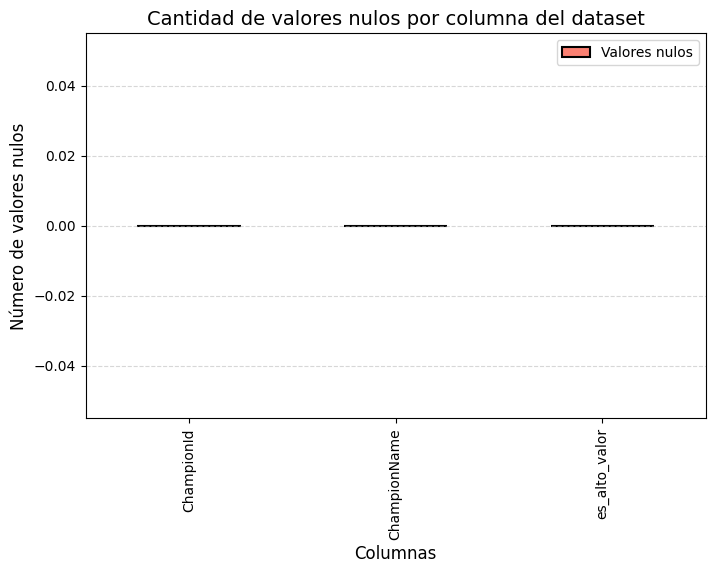

In [2]:

# PROYECTO: EL DETECTIVE DE DATOS

import pandas as pd
import matplotlib.pyplot as plt


# ETAPA 1: CARGA DEL DATASET

df = pd.read_csv("/content/ChampionTbl.csv")

# ETAPA 2: ANÁLISIS EXPLORATORIO

print("\nTipos de datos:")
print(df.dtypes)

print("\nValores nulos por columna:")
print(df.isna().sum())

print("\nEstadísticas:")
print(df.describe())

# LIMPIEZA
col_nulos = df.isna().sum().idxmax()
porcentaje = df[col_nulos].isna().mean() * 100

if porcentaje < 5:
    df = df.dropna(subset=[col_nulos])
    print("\nLimpieza aplicada: dropna() en", col_nulos)
elif pd.api.types.is_numeric_dtype(df[col_nulos]):
    df[col_nulos] = df[col_nulos].fillna(df[col_nulos].mean())
    print("\nLimpieza aplicada: fillna(media) en", col_nulos)
else:
    df[col_nulos] = df[col_nulos].fillna("Desconocido")
    print("\nLimpieza aplicada: fillna('Desconocido') en", col_nulos)


# ETAPA 3: LÓGICA Y TRANSFORMACIÓN

numericas = df.select_dtypes(include="number").columns

if len(numericas) > 0:
    col_num = numericas[0]
else:
    df["ValorDummy"] = range(len(df))
    col_num = "ValorDummy"

df["es_alto_valor"] = df[col_num] > df[col_num].mean()

# Bucle for
contador = 0
for x in df["es_alto_valor"]:
    if x:
        contador += 1
print("\nTotal 'alto valor':", contador)


# ETAPA 4: GRÁFICAS

plt.rcParams["figure.figsize"] = (8, 5)

# 1) HISTOGRAMA — azul con bordes y transparencia
plt.figure()
plt.hist(df[col_num], bins=10, color="skyblue", edgecolor="black", alpha=0.8, label=col_num)
plt.title(f"Distribución {col_num}", fontsize=14)
plt.xlabel("Valor numérico", fontsize=12)
plt.ylabel("Cantidad de campeones", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# 2) BARRAS es_alto_valor — verde + bordes + etiquetas grandes
plt.figure()
df["es_alto_valor"].value_counts().plot(
    kind="bar",
    color=["lightgreen", "mediumseagreen"],
    edgecolor="black",
    linewidth=1.5,
    label="es_alto_valor"
)
plt.title("Comparación entre Alto valor vs Valor normal", fontsize=14)
plt.xlabel("Categoría", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# 3) BARRAS DE NULOS — rojo pastel + bordes + etiquetas
plt.figure()
df.isna().sum().plot(
    kind="bar",
    color="salmon",
    edgecolor="black",
    linewidth=1.5,
    label="Valores nulos"
)
plt.title("Cantidad de valores nulos por columna del dataset", fontsize=14)
plt.xlabel("Columnas", fontsize=12)
plt.ylabel("Número de valores nulos", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()